# Testando o TPOT

In [1]:
from marvinml.marvinautoml import get_automl_classifier,get_automl_regressor

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data.astype(np.float64),
    iris.target.astype(np.float64), train_size=0.75, test_size=0.25, random_state=42)


tpot = get_automl_classifier(backend="tpot",generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_iris_pipeline.py')

Version 0.10.2 of tpot is outdated. Version 0.11.6 was released Monday October 26, 2020.


Generation 1 - Current best internal CV score: 0.9652173913043478
Generation 2 - Current best internal CV score: 0.9739130434782609
Generation 3 - Current best internal CV score: 0.9739130434782609
Generation 4 - Current best internal CV score: 0.9739130434782609
Generation 5 - Current best internal CV score: 0.9739130434782609

Best pipeline: KNeighborsClassifier(Normalizer(input_matrix, norm=l1), n_neighbors=53, p=2, weights=distance)
1.0


# Testando o H2O.ai

In [1]:
from marvinml.marvinautoml import get_automl_classifier, get_automl_regressor
import h2o
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

h2o.init()

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='target'), iris['target'], test_size=0.2, random_state=1)
automl = get_automl_classifier(backend="h2o", max_models=20, seed=1)
automl.fit(x=X_train.columns, y='target', training_frame = (X_train, y_train))

X_test = h2o.H2OFrame.from_python(X_test)
preds = automl.predict(X_test).as_data_frame()['predict'].values

lb = automl.leaderboard
print(lb.head(rows=lb.nrows))

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 3 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.1
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_fernandozagatti_bncl2b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.701 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |██████████
20:25:40.585: Skipping training of model GBM_5_AutoML_20201115_202531 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20201115_202531.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.


██████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_grid__1_AutoML_20201115_202531_model_4,0.0305875,0.174893,0.0305875,0.0797756,0.072038
StackedEnsemble_BestOfFamily_AutoML_20201115_202531,0.0336411,0.183415,0.0336411,0.0913245,0.0754604
XGBoost_grid__1_AutoML_20201115_202531_model_3,0.0356558,0.188827,0.0356558,0.0533747,0.0744385
GBM_4_AutoML_20201115_202531,0.0368964,0.192084,0.0368964,0.0860808,0.0789859
XGBoost_2_AutoML_20201115_202531,0.0390019,0.197489,0.0390019,0.0934516,0.0796036
GBM_3_AutoML_20201115_202531,0.0396834,0.199207,0.0396834,0.096937,0.0823468
GBM_2_AutoML_20201115_202531,0.0400547,0.200137,0.0400547,0.09278,0.0836715
DRF_1_AutoML_20201115_202531,0.0404636,0.201156,0.0404636,0.0921774,0.0844983
GBM_1_AutoML_20201115_202531,0.0433708,0.208256,0.0433708,0.0783135,0.083187
GBM_grid__1_AutoML_20201115_202531_model_1,0.0445195,0.210996,0.0445195,0.117146,0.0904054


# Testando o Auto-Sklearn

In [12]:
from marvinml.marvinautoml import get_automl_classifier,get_automl_regressor

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
    iris.target, train_size=0.75, test_size=0.25, random_state=42)


autosk = get_automl_classifier(backend="autosk",time_left_for_this_task=30)#, per_run_time_limit=30, 
                             #resampling_strategy='cv', resampling_strategy_arguments={'folds': 5})
autosk.fit(X_train, y_train)

RuntimeError: scikit-learn estimators should always specify their parameters in the signature of their __init__ (no varargs). <class 'marvinml.backend.autoskbackend.AutoskClassifierBackend'> with constructor (self, *args, **kwargs) doesn't  follow this convention.

In [4]:
preds = autosk.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, preds))

Accuracy score 1.0


# Testando o AutoVIZ (Automatic EDA)

Imported AutoViz_Class version: 0.0.74. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
ALERT: verbose=2 saves plots in local disk under AutoViz_Plots dir and does not display charts anymore
Shape of your Data Set: (891, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Could not draw Heat Map
Time to run AutoViz (in seconds) = 1.725


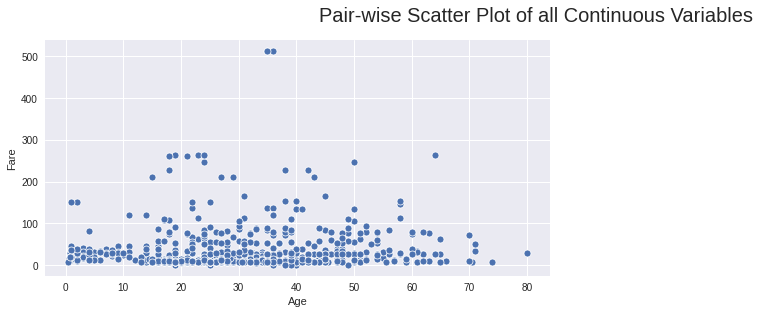

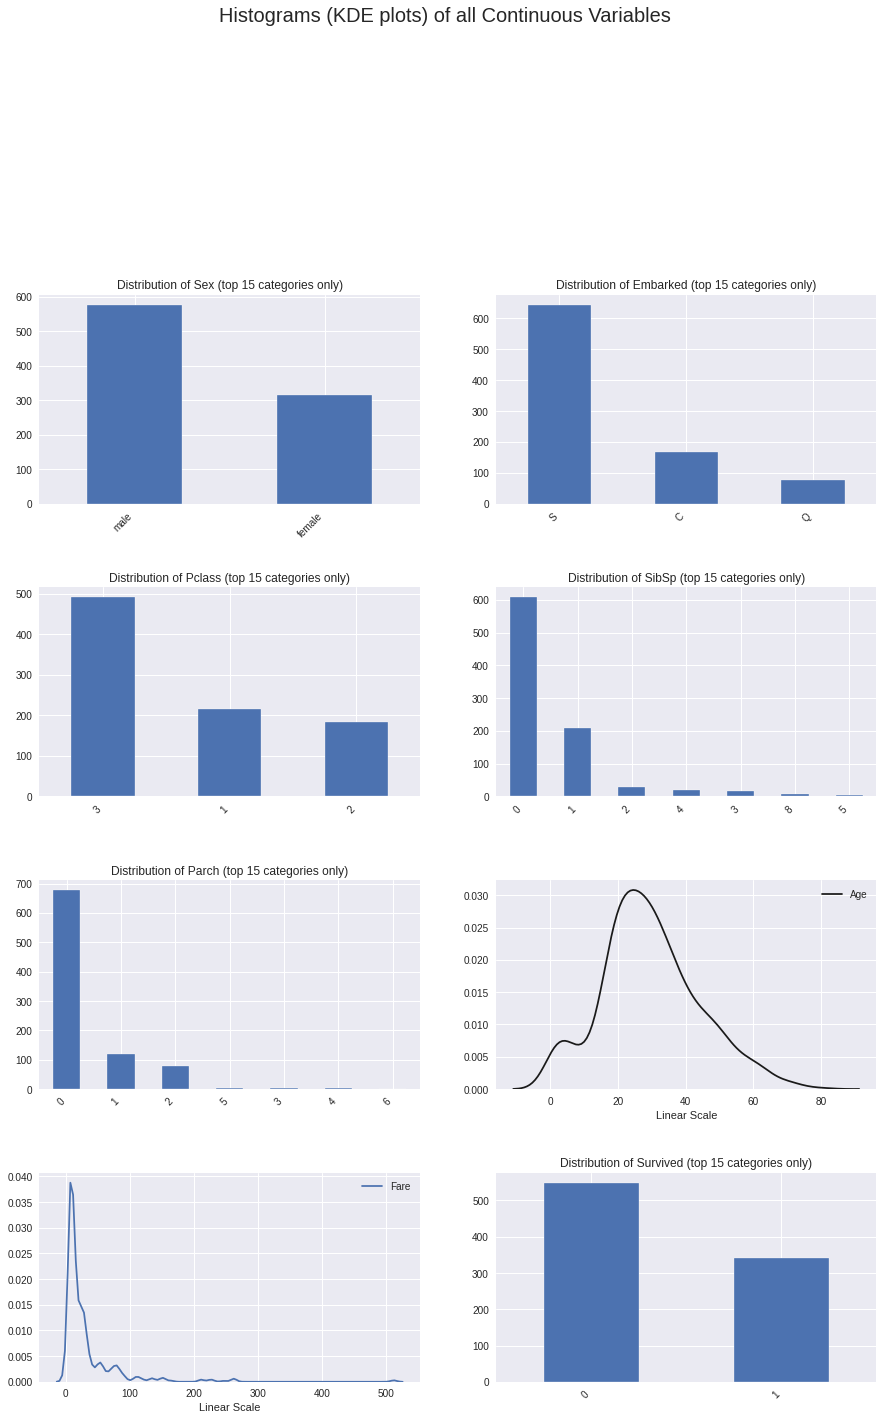

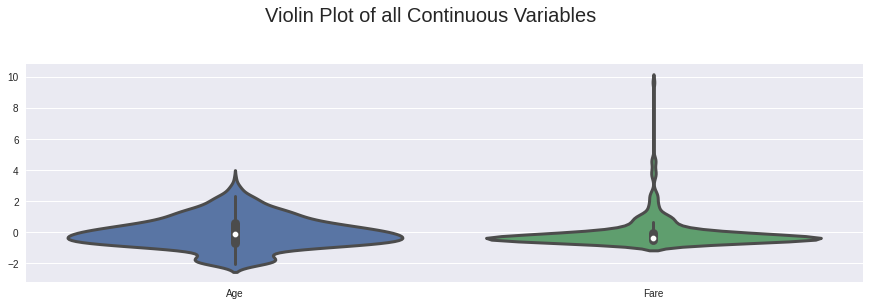

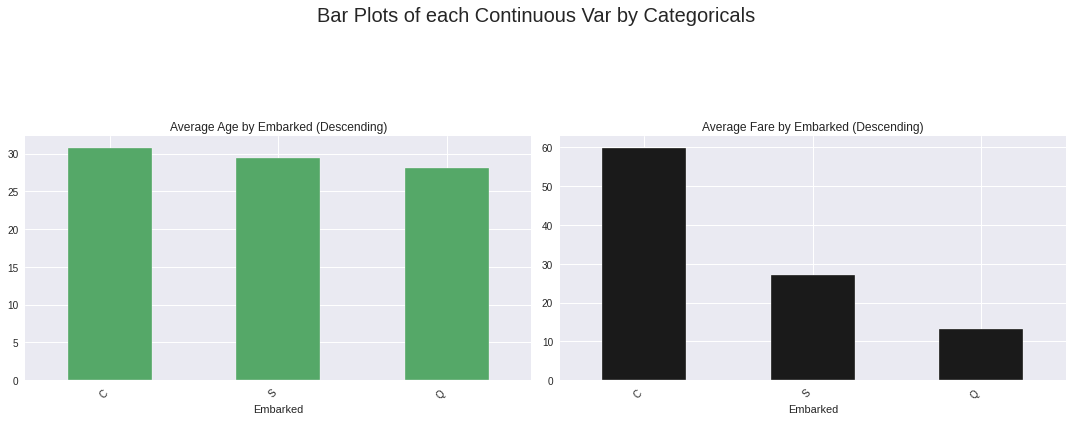

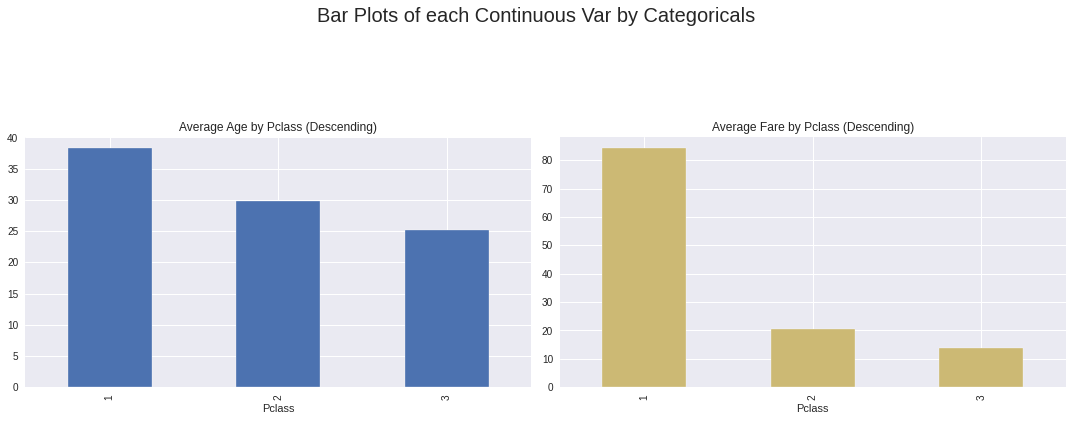

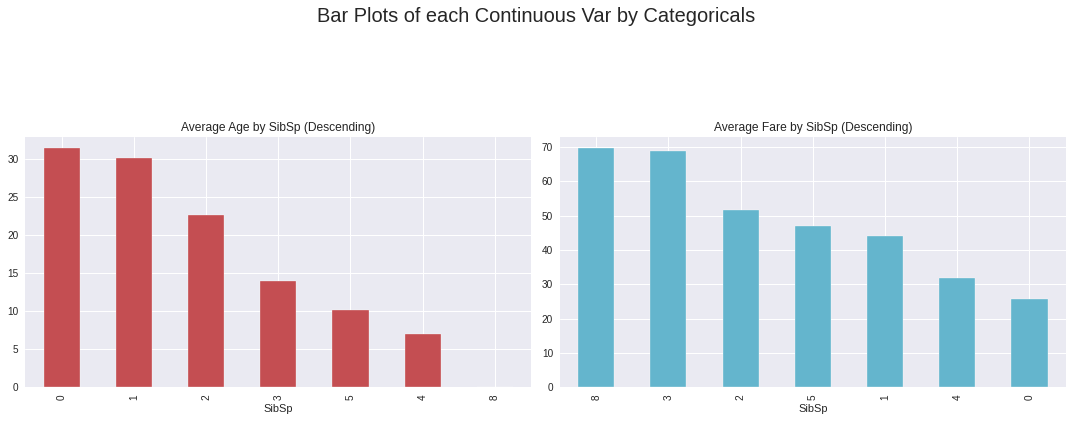

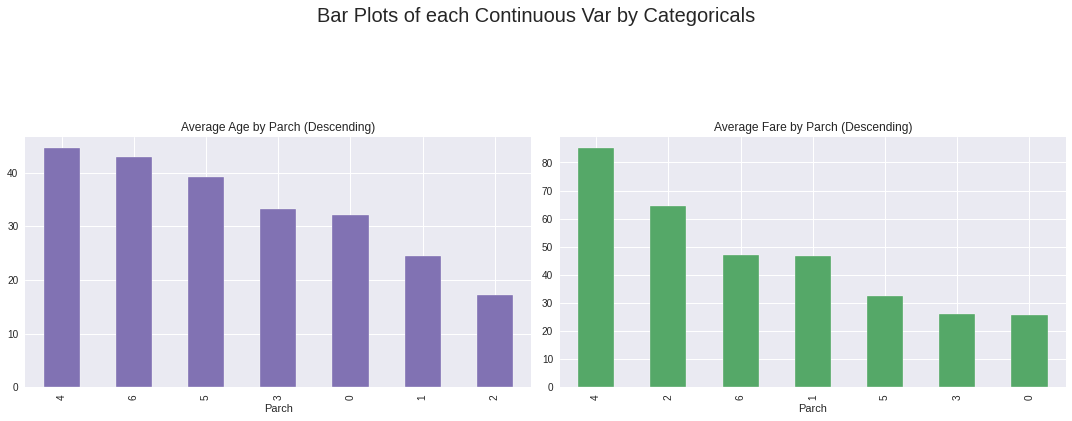

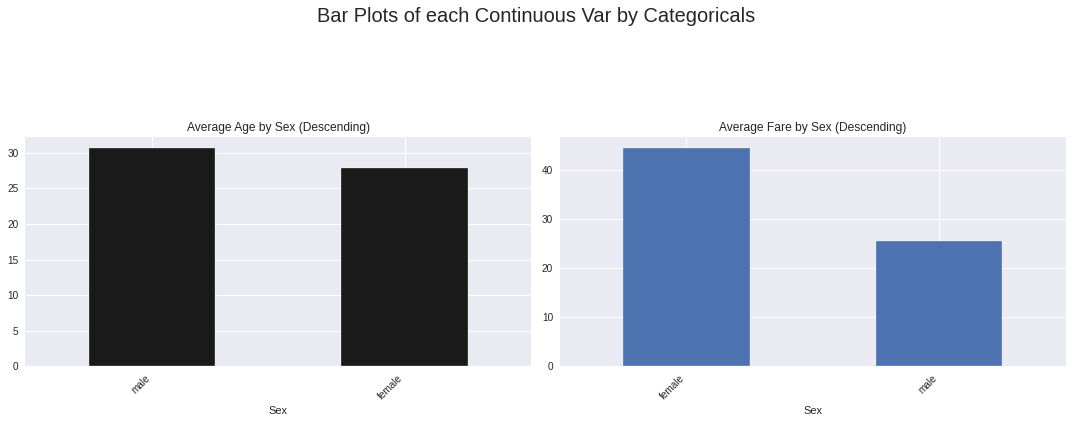

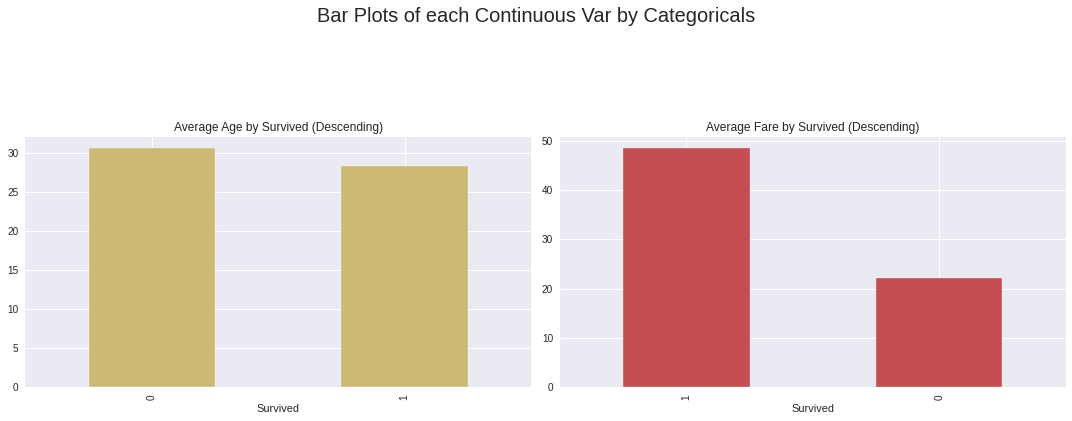

In [1]:
from marvinml.marvinautoml import get_auto_eda

auto_eda = get_auto_eda(backend="autoviz")

auto_eda.show("/home/lucas/notebooks/datasets/titanic/train.csv")

# Testando o pré-processamento

In [1]:
from marvinml.marvinautoml import get_data_preparation
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

iris, transformer = get_data_preparation(backend="preprocess", dataframe=iris, pipeline=['imputation_mean', 'label_encoder', 'imputation_median'], target='target')

Stage -->  imputation_mean
Stage -->  label_encoder
Stage -->  imputation_median


In [3]:
from marvinml.marvinautoml import get_data_preparation
iris, transformer = get_data_preparation(backend="data_prep", dataframe=iris, target='target')

Dataset without categorical data and null values.
No need data preparation.


### Teste com o Titanic

In [1]:
import pandas as pd
titanic = pd.read_csv('/home/fernandozagatti/Área de Trabalho/Datasets e treinamento/4.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from marvinml.marvinautoml import get_data_preparation
titanic, transformer = get_data_preparation(backend="data_prep", dataframe=titanic, target='Survived')

Dataset with categorical data and null values.
Applied techniques:  ['imputation_deletion_case', 'label_encoder', 'oversampling'] 

Stage -->  imputation_deletion_case
Stage -->  label_encoder
Stage -->  oversampling


In [3]:
titanic

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Ticket,Sex,Cabin,Embarked,Survived
0,2,1,38.0,1,0,71.2833,49.0,109.0,0.0,72.0,0.0,1
1,4,1,35.0,1,0,53.1000,70.0,31.0,0.0,48.0,2.0,1
2,7,1,54.0,0,0,51.8625,112.0,55.0,1.0,117.0,2.0,0
3,11,3,4.0,1,1,16.7000,148.0,120.0,0.0,131.0,2.0,1
4,12,1,58.0,0,0,26.5500,27.0,26.0,0.0,43.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241,293,2,36.0,0,0,12.8750,102.0,123.0,1.0,80.0,0.0,0
242,873,1,33.0,0,0,5.0000,35.0,89.0,1.0,29.0,2.0,0
243,149,2,36.5,0,2,26.0000,124.0,66.0,1.0,128.0,2.0,0
244,700,3,42.0,0,0,7.6500,94.0,77.0,1.0,126.0,2.0,0


### Transformando novos casos

In [5]:
teste = [[4, 1, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', 35.0, 1, 0, '113803', 53.1000, 'C123', 'S']]
teste = pd.DataFrame(teste, columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S


In [6]:
teste = get_data_preparation(backend="trans", dataframe=teste, trans=transformer)

In [7]:
teste

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Ticket,Sex,Cabin,Embarked
0,4,1,35.0,1,0,53.1,70.0,31.0,0.0,48.0,2.0
